# Derin Öğrenmenin Temelleri Hakkında Özet

📆 Bu özetin gündeminde neler var?

- ***Giriş***: Belgeleri nasıl okumalı?
- ***Bölüm 1️⃣***: Tensorflow ve Keras'ın gizemi (👨🏻‍🏫 Öğretmen liderliğinde)
- ***Bölüm 2️⃣***: Tensorflow mu Numpy mi? (👨🏻‍🏫 Öğretmen liderliğinde)
- ***Bölüm 3️⃣***: Orman Yangınları Mücadelesi (👩‍🎓 Öğrenci liderliğinde)

## Giriş: Belgeleri nasıl okunur?

✅ [Keras.io](https://keras.io/getting_started/) üst düzey Keras API'sının belgeleri:
- Birçok derin öğrenme görevi için çok sayıda öğretici içerir.
- Daha ayrıntılı geliştirici kılavuzları da içerir.
- Tam Keras API belgeleri de içerir.
- Keras 3 belgelerini her zaman kontrol ettiğinizden emin olun.

&nbsp;

✅ [Tensorflow.org](https://www.tensorflow.org/overview) size başvurabileceğiniz iki ana sayfa sunar:
- [Öğretici](https://www.tensorflow.org/tutorials)
- [Kılavuz](https://www.tensorflow.org/guide)
- Bu eğitimlerin `Colab-Notebooks`'larını bile çalıştırabilirsiniz

&nbsp;

✅ TensorFlow [API belgeleri](https://www.tensorflow.org/api_docs/python/tf/), Keras için kullandığımız kapsamlı (ve bazen çok düşük seviyeli) TensorFlow destekli belgelerdir:
- Google Arama'da öncelikli olarak görünür
- [Bazen](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), ilgili Öğreticiler veya Kılavuzlara referanslar verebilir

# 1️⃣ - Tensorflow ve Keras'ın gizemi çözülüyor 
_(🧑🏻‍🏫 Öğretmen liderliğinde)_

👉 Hedef: Tensorflow ve Keras kullanarak, sahte bir veri kümesi oluşturun ve bununla sahte bir model oluşturun.

### (1) Tensörler?

📚 [Online Guide](https://www.tensorflow.org/guide/tensor)

In [1]:
# Dizüstü bilgisayar tabanlı deneyler için her şeyi içe aktarmak sorun değildir!
import tensorflow as tf
import keras
import numpy as np

In [2]:
# Tensörler, numpy nesnelerinin etrafını saran sarmalayıcılardır.

X = tf.constant([[1., 1., 1.],
                 [1., 1., 1.],
                 [1., 1., 1.]])
X

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [3]:
tf.ones((3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [4]:
x = X.numpy()
x

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [5]:
# Tensörlerin bir şekli vardır
X.shape

TensorShape([3, 3])

In [6]:
# Tensörler Numpy nesnelerinden başlatılabilir
tf.constant(x)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [7]:
# Numpy'ye benzer sözdizimi ile manipüle edilebilirler.
tf.add(X,X)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)>

In [8]:
# Tersine, Numpy de Tensor öğelerini kabul eder!
np.add(X,X)

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)

In [9]:
# Tensors kullanarak özel MSE kayıp fonksiyonu örneği

def loss(y_true, y_pred):
    err = y_true - y_pred
    return tf.reduce_mean(tf.square(err))

y_true = tf.ones((10,3))
y_pred = tf.ones((10,3)) + 0.1 * tf.random.normal((10,3))

loss(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.005697601940482855>

#### Other Tensors?

**Seyrek Tensörler**
<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/sparse_tensors.png">

In [10]:
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
sparse_tensor.shape

TensorShape([3, 4])

**Ragged Tensors**
<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/ragged_tensors.png">

In [11]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

ragged_tensor = tf.ragged.constant(ragged_list)
ragged_tensor.shape

TensorShape([4, None])

### (2) `Sequential API` ile bir sinir ağı oluşturun

👉 Her biri 3 özellikten oluşan 10 rastgele gözlem `X` ve tek boyutlu bir hedef `y` oluşturalım. 

In [12]:
# Her biri için 10 özellik içeren 100 gözlem oluşturalım.
X = tf.random.uniform((100,10))

In [13]:
# Ve sahte hedefimizi her gözlemin ortalaması olarak basitçe oluşturun
y = tf.reduce_mean(X, axis=1)
y.shape

TensorShape([100])

👉 “Çalışan” basit bir yoğun model oluşturalım.

In [14]:
from keras import Sequential, Input, layers

In [15]:
# Normal syntax

model = Sequential()
model.add(Input(shape=(10,)))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Eşdeğer
model = Sequential([
    Input(shape=(10,)),
    layers.Dense(30, activation='relu'),
    layers.Dense(1),
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Giriş katmanını belirtmezsek ne olur?
model = Sequential()
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1))

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Tüm katmanlara hala ayrı ayrı erişilebilir.
model.layers

[<Dense name=dense_4, built=False>, <Dense name=dense_5, built=False>]

In [20]:
# Ve “tensor” girdisiyle katmanı çağırın.
x1 = model.layers[0](X)

# x1, rastgele (başlangıç) ağırlıklarla katman 1'den gelen aktivasyonumuzdur.
x1.shape

TensorShape([100, 30])

In [21]:
# x2 bizim çıktımızdır
x2 = model.layers[1](x1)
x2.shape

TensorShape([100, 1])

### (3) Keras Input

Bunu neden kullanıyoruz?
```python
keras.Input(shape=(10,))
```
Katmanlarınıza 100 **gerçek** gözlem aktarmak yerine, benzer şekle (10,) sahip `None` gözlemlerden oluşan bir `keras.Input` aktarın.  

Hesaplama optimizasyonu amacıyla kullanılır (bellek ön tahsisi ve paralelleştirme için ağ grafikleri). 

In [22]:
inputs = keras.Input(shape=(10,))
inputs

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, ragged=False, name=keras_tensor_7>

In [23]:
model.layers[0](inputs)

<KerasTensor shape=(None, 30), dtype=float32, sparse=False, ragged=False, name=keras_tensor_8>

In [28]:
x = model.layers[0](inputs) # Giriş katmanı
x = layers.Dense(30, activation='relu')(inputs) # İlk katman çıkışı
x = layers.Dense(20, activation='relu')(x) # İkinci katman çıkışı
x = layers.Dense(10, activation='relu')(x) # Üçüncü katman çıkışı
outputs = layers.Dense(1)(x)               # Son katman çıkışı

outputs.shape

(None, 1)

In [29]:
# Keras, girdi ve çıktı katmanlarından bir model oluşturmanıza olanak tanır.
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,171 (4.57 KB)

 Trainable params: 1,171 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

☝️ Bu model oluşturma yöntemi Keras [İşlevsel API](https://www.tensorflow.org/guide/keras/functional) olarak adlandırılır.
- [Sıralı API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) ile karşılaştırıldığında: `model.add(...)`
- Karmaşık (sıralı olmayan) mimari için zorunludur...
- Belgelerin her yerinde kullanılır.

# 2️⃣ - Tensorflow mu, Numpy mi?

### Array ve tensor arasındaki fark nedir?

👉 NumPy dizileri ile tf.Tensors arasındaki önemli farklar şunlardır:

1. Tensors değiştirilemez
2. Tensors, hızlandırıcı bellek (GPU, TPU gibi) ile desteklenebilir

**Immutable**

In [30]:
# bir dizi öğesi yeniden atanabilir

array = np.array([1,1,1])

array[1] = 2

array

array([1, 2, 1])

In [31]:
# bir tensör elemanı yeniden atanamaz

tensor = tf.constant([1., 1., 1.])

tensor[1] = 2

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

**Hızlandırıcı bellek ile desteklenir**

Tensörler, hızlandırıcı bellek (GPU, TPU gibi) tarafından desteklenir. Tensör işlemlerinizi gerçekleştirmek için kullanılacak işlemciyi manuel olarak seçebilirsiniz.

⏩⏩⏩ [Belgeleri](https://www.tensorflow.org/guide/gpu) inceleyin.

In [32]:
# CPU'nun kullanılabilirliğini kontrol edin
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))

Num CPUs Available:  1


In [33]:
# CPU'nun kullanılabilirliğini kontrol edin
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


Bilgisayarınızda GPU olması pek olası değildir... Kim ücretsiz GPU kullanımı sunuyor tahmin edin? Google! 

👉 **Özetlemeye devam etmek ve işlem sürelerini karşılaştırmak için Google Colab'a geçelim.**

In [34]:
# Colab'ı doğru şekilde kurduysanız, kullanabileceğiniz bir GPU'nuz olmalıdır.
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [35]:
# Matris çarpma işlemini gerçekleştiren ve bize süreyi döndüren fonksiyon.
import time

def time_matmul(types,x):

    start = time.time()

    if types=='numpy':
        np.matmul(x,x)

    else:
        tf.matmul(x,x)

    diff = time.time() - start

    return diff*1000


👇 Bu hücreyi iki kez çalıştırın (ilk çalıştırıldığında, GPU için tensorflow derlemesi biraz zaman alır)

In [40]:
shape_dim = []
num_time = []
cpu_tf_time = []
gpu_tf_time = []

for shape in range(500, 2001, 100):

    print(f"Multiplication of shape [{shape},{shape}]")

    shape_dim.append(shape)

    # Numpy çarpımı
    x_np = np.random.uniform(size=[shape, shape])
    num_time.append(time_matmul('numpy', x_np))

    # CPU'da tensör
    with tf.device("CPU:0"):
        x = tf.random.uniform([shape, shape])
        cpu_tf_time.append(time_matmul('cpu', x))

    # GPU'da tensör
    with tf.device("GPU:0"):
        x = tf.random.uniform([shape, shape])
        gpu_tf_time.append(time_matmul('gpu', x))

print("Done multiplying!")

Multiplication of shape [500,500]
Multiplication of shape [600,600]
Multiplication of shape [700,700]
Multiplication of shape [800,800]
Multiplication of shape [900,900]
Multiplication of shape [1000,1000]
Multiplication of shape [1100,1100]
Multiplication of shape [1200,1200]
Multiplication of shape [1300,1300]
Multiplication of shape [1400,1400]
Multiplication of shape [1500,1500]
Multiplication of shape [1600,1600]
Multiplication of shape [1700,1700]
Multiplication of shape [1800,1800]
Multiplication of shape [1900,1900]
Multiplication of shape [2000,2000]
Done multiplying!


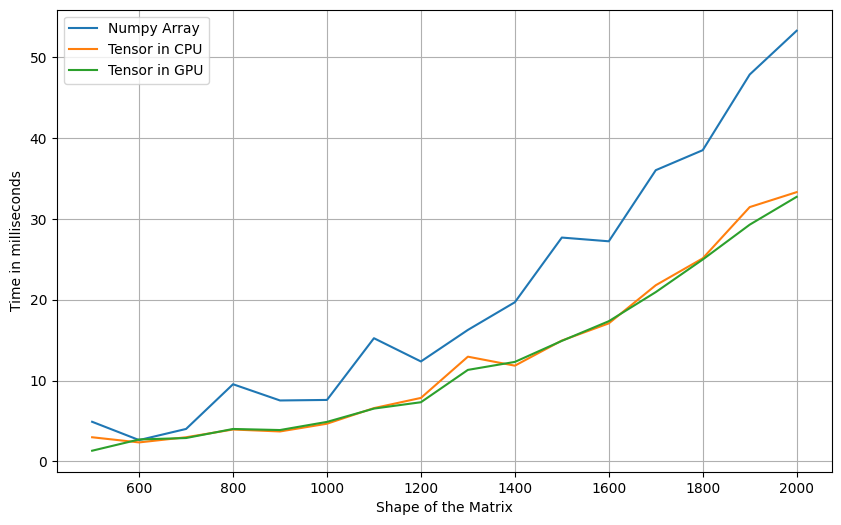

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(shape_dim, num_time, label="Numpy Array")
plt.plot(shape_dim, cpu_tf_time, label="Tensor in CPU")
plt.plot(shape_dim, gpu_tf_time, label="Tensor in GPU")
plt.grid()
plt.xlabel("Shape of the Matrix")
plt.ylabel("Time in milliseconds")
plt.legend()

👉 **Google Colab'ı nasıl kuracağınızla ilgili [eğitimimizi](https://docs.google.com/document/d/1oU4pQbNxCfu5Rm1ANfIqgylZfExsTVrnMLdKZz4toig/edit?usp=sharing)  inceleyin, önümüzdeki günlerde bunu kullanacaksınız**

# 3️⃣ (isteğe bağlı) - Orman Yangınları Mücadelesi 
(👩‍🎓Öğrenci liderliğinde)

### (1) Veriler

`tensorflow_dataset`, <a href="https://www.tensorflow.org/datasets/catalog/overview">burada</a> bulunan birçok `Datasets` sağlar.

**`forest_fires`** veri setini yükleyelim. Hedef, yangın nedeniyle zarar gören alandır (daha fazla ayrıntı için https://www.tensorflow.org/datasets/catalog/forest_fires).

In [43]:
pip install tensorflow-datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 11.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 13.5 MB/s  0:00:02m0:00:0100:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21581 sha256=6006bbb376ba188e5f83a3c7425c490b72491acf2b3d1ca1330514f883c54c59
  Stored in directory: /Users/lacinkaraarslan/Library/Caches/pip/wheels/e7/e6/28/864bdfee5339dbd6ddcb5a186286a8e217648ec198bdf0097d
Successfully built promise
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15/15 [tensorflow-datasets]nsorflow-datasets]
Note: you may need to restart the kernel to use updated packages.


In [44]:
import tensorflow_datasets as tfds
import pandas as pd
from sklearn.model_selection import train_test_split

In [45]:
area, features = tfds.as_numpy(tfds.load(
    'forest_fires',
    split='train',
    batch_size=-1,
    as_supervised=True,
))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/lacinkaraarslan/tensorflow_datasets/forest_fires/incomplete.TBQW8K_0.0.1/forest_fires-train.t…

Dataset forest_fires downloaded and prepared to /Users/lacinkaraarslan/tensorflow_datasets/forest_fires/0.0.1. Subsequent calls will reuse this data.


2026-01-20 20:40:34.474824: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:396] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


In [46]:
X = pd.DataFrame(features).values
y = area
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y = area

### (2) Modelinizin genel mimarisini açıklayın


❓ Keras'ı import edin ve bir Sıralı model tanımlayın

In [47]:
# SENİN KODUN BURAYA
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

❓ 50 nöronlu ve `relu` aktivasyon fonksiyonlu bir Dense katmanı ekleyin. Giriş şeklini belirtmeyi unutmayın.

In [48]:
# SENİN KODUN BURAYA
model.add(
    layers.Dense(
        50,
        activation="relu",
        input_shape=(X.shape[1],)
    )
)

/Users/lacinkaraarslan/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


❓ 20 nöronlu ve `relu` aktivasyon fonksiyonlu ikinci bir tam bağlantılı katman ekleyin.

In [49]:
# SENİN KODUN BURAYA
model.add(
    layers.Dense(
        20,
        activation="relu"
    )
)

❓ Regresyon görevinize uygun son bir katman ekleyin

In [50]:
# SENİN KODUN BURAYA
model.add(
    layers.Dense(1)
)

❓ Modelinizin parametre sayısını kontrol edin.

Yoğun Sinir Ağınızın her katmanında yer alan parametre sayısını doğru anladığınızdan emin olmak için bunları manuel olarak yeniden sayın.

In [51]:
# SENİN KODUN BURAYA
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 50)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,691 (6.61 KB)

 Trainable params: 1,691 (6.61 KB)

 Non-trainable params: 0 (0.00 B)

1. katman (Dense 50):
ağırlıklar: (giriş_feature_sayısı × 50)
bias: 50
2. katman (Dense 20):
ağırlıklar: (50 × 20)
bias: 20
3. çıkış Katmanı (Dense 1):
ağırlıklar: (20 × 1)
bias: 1
toplam parametre sayısı model.summary() çıktısı ile uyumludur

### (3) Modelinizin nasıl eğitildiğini tanımlayın 


❓ Modeli `adam` `optimizer` ve `mse` `loss` ile derleyin.

In [52]:
# SENİN KODUN BURAYA
model.compile(
    optimizer="adam",
    loss="mse"
)

❓Modeli bu rastgele veriler üzerinde çalıştırın; bir dizi `epochs` ve bir `batch_size` seçmeyi unutmayın. Geri dönen sonucu `history` içinde saklayın.

In [53]:
# SENİN KODUN BURAYA
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7036.8789 - val_loss: 646.1652
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6584.6309 - val_loss: 748.3632
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6597.5137 - val_loss: 716.1998
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6577.3735 - val_loss: 669.9779
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6563.5039 - val_loss: 663.3715
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6556.1128 - val_loss: 659.8476
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6562.1987 - val_loss: 647.8502
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6559.9019 - val_loss: 657.1595
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6550.9355 - val_loss: 653.8745
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6554.3486 - val_loss: 650.8040
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6549.0225 - val_loss: 657.0239
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2

❓ Model yakınsamasını çiz

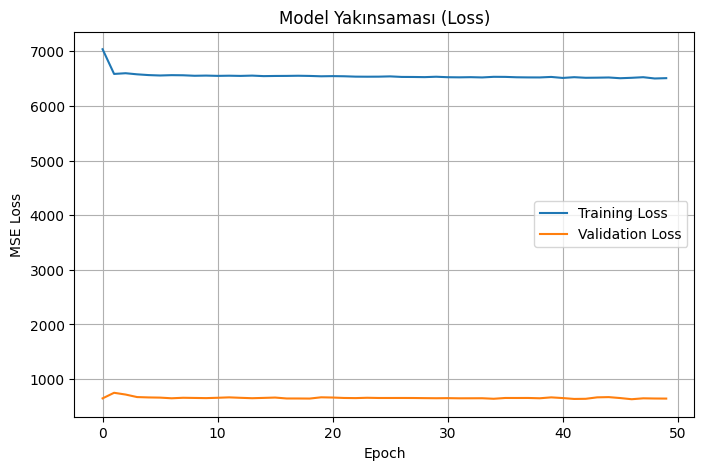

In [54]:
# SENİN KODUN BURAYA
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Model Yakınsaması (Loss)")
plt.legend()
plt.grid(True)
plt.show()

❓ Bir `init_model` fonksiyonu içinde derlemesi ile birlikte tüm modeli yazın.

In [55]:
# SENİN KODUN BURAYA
def init_model(input_dim):
    model = keras.Sequential([
        layers.Dense(50, activation="relu", input_shape=(input_dim,)),
        layers.Dense(20, activation="relu"),
        layers.Dense(1)
    ])

    model.compile(
        optimizer="adam",
        loss="mse"
    )

    return model

Modelin parametrelerini yeniden başlatmak için, bazı verileri uydurmadan önce modeli sistematik olarak yeniden oluşturmanız (init işleviyle) önerilir.

Az önce yazdığınız model regresyon görevleri için uygundur.

Peki, ikili sınıflandırma görevi gerçekleştirmek istersek ne yapmalıyız?

❓ Başka bir `init_model_2` işlevi yazın ve bu işlevde şunları değiştirin:
* mimarinin son katmanı 
* ve ikili sınıf sınıflandırma probleminde kullanılan derleme yöntemi.

In [56]:
# SENİN KODUN BURAYA
def init_model_2(input_dim):
    model = keras.Sequential([
        layers.Dense(50, activation="relu", input_shape=(input_dim,)),
        layers.Dense(20, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])

    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

❓ 10 sınıflı bir sınıflandırma problemi için bir model tanımlamak üzere son bir fonksiyon yazın.

In [57]:
# SENİN KODUN BURAYA
def init_model_10_class(input_dim):
    model = keras.Sequential([
        layers.Dense(50, activation="relu", input_shape=(input_dim,)),
        layers.Dense(20, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model